# Technical Test

Summary:
=

1. [API Pipedrive](#1)
2. [Création de la BD PostgreSQL](#2)
3. [Connexion à la DB postgreSQL](#3)
4. [Visualisation DATA](#4)

In [1]:
import psycopg2
import requests
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 1. API Pipedrive: <a class="anchor" id="1"></a>

- Connexion à l'API via token
- Récupération des variables (colonnes)

In [2]:
# token récupéré depuis la page dédiée "https://x20.pipedrive.com/settings/api"
token = {
    'api_token': '3de2dd46cd6d38a1376e9c906647d61f4c2ac41d'
}

# L'URL de base de l'API Pipedrive
base_url = "https://api.pipedrive.com/v1/"

# Endpoint pour les variables de contact
endpoint = "personFields"

# Chemin complet 
url_personFields = base_url + endpoint

# Envoie de la requête GET 
get_response = requests.get(url_personFields, params=token)

# Convertir la réponse en JSON
get_content = json.loads(get_response.content)

# Itérer dans la liste de données et print les variables par leur "name"
get_data = get_content['data']
for i, v in enumerate(get_data):
    print(i, v['name'])

0 ID
1 Nom
2 Étiquette
3 Téléphone
4 E-mail
5 Personne créée
6 Heure de mise à jour
7 Organisation
8 Propriétaire
9 Affaires en cours
10 Visible par
11 Date de la prochaine activité
12 Date de la dernière activité.
13 Affaires gagnées
14 Affaires perdues
15 Affaires clôturées
16 Total des activités
17 Activités terminées
18 Activités à faire
19 Nombre de messages e-mail
20 Photo du profil
21 Dernier e-mail reçu
22 Dernier e-mail envoyé
23 Prénom
24 Nom de famille
25 trial end date


### - lister les contacts par (id, nom, email)

In [3]:
# Le endpoint pour les personnes (contacts)
endpoint = "persons"

# Construire l'URL complète
url_persons = base_url + endpoint

# Envoyer la requête GET et obtenir la réponse
response = requests.get(url_persons, params=token)

# Vérifier le statut de la réponse
if response.status_code == 200:
    # Convertir la réponse en JSON
    persons_data = response.json()
    
    # Parcourir la liste des personnes
    for person in persons_data["data"]:
        # Afficher l'id, le nom de la personne ainsi que son email
        print(f"id:{person['id']} | contact:{person['name']} | email:{person['primary_email']}")
else:
    # Afficher un message d'erreur
    print("Erreur: ", response.status_code)
    
# print(persons_data["data"][0])

id:37 | contact:[Exemple] Phyllis Yang | email:phyllis.yang@gmial.com
id:38 | contact:[Exemple] Benjamin Leon | email:benjamin.leon@gmial.com
id:39 | contact:[Exemple] Gloria Quinn | email:gloria.quinn@empowermmove.com
id:40 | contact:[Exemple] Kanushi Barnes | email:kanushi.barnes@gmial.com
id:41 | contact:[Exemple] Tony Turner | email:tony.turner@moveer.com
id:42 | contact:[Exemple] Veronika Startland | email:veronika.startland@venuspowwer.com
id:43 | contact:[Exemple] Otto Miller | email:otto.miller@itablee.eu
id:44 | contact:[Exemple] Githa Watson | email:githa.watson@odamoneet.com
id:45 | contact:[Exemple] Gianluigi Ferraro | email:gianluigi@ferraroo.it
id:46 | contact:[Exemple] Peru Zitan | email:peru.zitan@loreannn.ee
id:47 | contact:[Exemple] Blair Davis | email:blair.davis@gmial.com
id:48 | contact:[Exemple] Haroon Bloggs | email:haroon.bloggs@gmial.com
id:49 | contact:[Exemple] Hugo Hall | email:hugo.hall@gmial.com
id:50 | contact:[Exemple] Francesca Almeiro | email:francesca

### - lister les deals par (id, titre, valeur, statut)

In [4]:
# Le endpoint pour les transactions
endpoint = "deals"

# Construire l'URL complète
url_deals = base_url + endpoint

# Envoyer la requête GET et obtenir la réponse
response = requests.get(url_deals, params=token)

# Vérifier le statut de la réponse
if response.status_code == 200:
    # Convertir la réponse en JSON
    deals_data = response.json()
    
    # Parcourir la liste des transactions
    for deal in deals_data["data"]:
        # Afficher l'id, le titre, la valeur ainsi que le statut de la transaction
        print(f"id:{deal['id']} | title:{deal['title']} | value:{deal['value']} | status:{deal['status']}")
else:
    # Afficher un message d'erreur
    print("Erreur: ", response.status_code)
    
# print(deals_data["data"][0])

id:29 | title:[Exemple] VenusPower | value:7000 | status:lost
id:30 | title:[Exemple] EmpowerMove | value:8000 | status:open
id:31 | title:[Exemple] Ferraro | value:4000 | status:won
id:32 | title:[Exemple] SoRock | value:31000 | status:open
id:33 | title:[Exemple] Tony Turner | value:30000 | status:open
id:34 | title:[Exemple] Damone | value:15000 | status:open
id:35 | title:[Exemple] Lorean | value:22000 | status:won
id:36 | title:[Exemple] Benjamin Leon | value:10000 | status:open
id:37 | title:[Exemple] iTable | value:7000 | status:open
id:38 | title:[Exemple] Phyllis & Cie | value:16000 | status:open
id:39 | title:[Exemple] HotelFromHome | value:12000 | status:won
id:40 | title:[Exemple] Pargadella Cars | value:18000 | status:lost
id:41 | title:[Exemple] Almeiro | value:1000 | status:lost
id:42 | title:[Exemple] Ola! | value:4000 | status:won


# 2. Création de la BD PostgreSQL: <a class="anchor" id="2"></a>

-- Database: techtest

-- DROP DATABASE IF EXISTS techtest;

CREATE DATABASE techtest
    WITH
    OWNER = postgres
    ENCODING = 'UTF8'
    LC_COLLATE = 'C'
    LC_CTYPE = 'C'
    TABLESPACE = pg_default
    CONNECTION LIMIT = -1
    IS_TEMPLATE = False;

COMMENT ON DATABASE techtest
    IS 'DB for tech test';

GRANT TEMPORARY, CONNECT ON DATABASE techtest TO PUBLIC;

GRANT ALL ON DATABASE techtest TO postgres;

# 3. Connexion à la DB postgreSQL: <a class="anchor" id="3"></a>

In [5]:
# Établir une connexion à la base de données PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="techtest",
    user="postgres",
    password="sudo"
)

cur = conn.cursor()

## - Création de la table contacts

In [14]:
try:
    # Création d'une table contacts dans la DB PostgreSQL
    sql = '''CREATE TABLE contacts(
        ID INT PRIMARY KEY NOT NULL,
        name VARCHAR(255),
        email VARCHAR(255)
      ); '''
    cur.execute(sql)
    conn.commit()
    print("Table contacts créée avec succès dans PostgreSQL")

except (Exception, psycopg2.Error) as error :
    print ("Erreur lors de la création du table PostgreSQL", error)

# Fermer la connexion à la base de données
conn.close()

Erreur lors de la création du table PostgreSQL cursor already closed


## - Création de la table deals

In [7]:
try:
    # Établir une connexion à la base de données PostgreSQL
    conn = psycopg2.connect(
        host="localhost",
        port="5432",
        database="techtest",
        user="postgres",
        password="sudo"
    )
    cur = conn.cursor()
    
    # Création d'une table deals dans la DB PostgreSQL
    sql = '''CREATE TABLE deals(
        ID INT PRIMARY KEY NOT NULL,
        title VARCHAR(255),
        value DECIMAL,
        status VARCHAR(255)
      ); '''
    cur.execute(sql)
    conn.commit()
    print("Table deals créée avec succès dans PostgreSQL")

except (Exception, psycopg2.Error) as error :
    print ("Erreur lors de la création du table PostgreSQL", error)

# Fermer la connexion à la base de données
conn.close()

Erreur lors de la création du table PostgreSQL ERREUR:  la relation « deals » existe déjà



## - Importation des contacts (id, name, email) depuis pipedrive vers postgresql

In [15]:
try:
    # Établir une connexion à la base de données PostgreSQL
    conn = psycopg2.connect(
        host="localhost",
        port="5432",
        database="techtest",
        user="postgres",
        password="sudo"
    )
    cur = conn.cursor()
    
    # Insérer les contacts dans la base de données PostgreSQL
    for person in persons_data["data"]:
        # Exécuter une requête SQL pour insérer le contact dans la table appropriée
        query = "INSERT INTO contacts (id, name, email) VALUES (%s, %s, %s)"
        values = (person["id"], person["name"], person["primary_email"])
        cur.execute(query, values)
        conn.commit()

except (Exception, psycopg2.Error) as error:
    print("Erreur lors de l'ajout des données :", error)

# Fermer la connexion à la base de données
conn.close()

Erreur lors de l'ajout des données : ERREUR:  la valeur d'une clé dupliquée rompt la contrainte unique « contacts_pkey »
DETAIL:  La clé « (id)=(37) » existe déjà.



## - Importation des deals (id, title, value, status) depuis pipedrive vers postgresql

In [16]:
try:
    # Établir une connexion à la base de données PostgreSQL
    conn = psycopg2.connect(
        host="localhost",
        port="5432",
        database="techtest",
        user="postgres",
        password="sudo"
    )
    cur = conn.cursor()

    # Répéter les mêmes étapes pour les transactions (deals)
    for deal in deals_data["data"]:
        # Exécuter une requête SQL pour insérer le deal dans la table appropriée
        query = "INSERT INTO deals (id, title, value, status) VALUES (%s, %s, %s, %s)"
        values = (deal["id"], deal["title"], deal["value"], deal["status"])
        cur.execute(query, values)
        conn.commit()

except (Exception, psycopg2.Error) as error:
    print("Erreur lors de l'ajout des données :", error)

Erreur lors de l'ajout des données : ERREUR:  la valeur d'une clé dupliquée rompt la contrainte unique « deals_pkey »
DETAIL:  La clé « (id)=(29) » existe déjà.



## - Verification du contenu de la table contacts (postgresql)

In [13]:
# Établir une connexion à la base de données PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="techtest",
    user="postgres",
    password="sudo"
)
cur = conn.cursor()
query = "SELECT * FROM contacts"
cur.execute(query)

res = cur.fetchall()

for row in res:
    print(row)

# Fermer la connexion à la base de données
conn.close()

(37, '[Exemple] Phyllis Yang', 'phyllis.yang@gmial.com')
(38, '[Exemple] Benjamin Leon', 'benjamin.leon@gmial.com')
(39, '[Exemple] Gloria Quinn', 'gloria.quinn@empowermmove.com')
(40, '[Exemple] Kanushi Barnes', 'kanushi.barnes@gmial.com')
(41, '[Exemple] Tony Turner', 'tony.turner@moveer.com')
(42, '[Exemple] Veronika Startland', 'veronika.startland@venuspowwer.com')
(43, '[Exemple] Otto Miller', 'otto.miller@itablee.eu')
(44, '[Exemple] Githa Watson', 'githa.watson@odamoneet.com')
(45, '[Exemple] Gianluigi Ferraro', 'gianluigi@ferraroo.it')
(46, '[Exemple] Peru Zitan', 'peru.zitan@loreannn.ee')
(47, '[Exemple] Blair Davis', 'blair.davis@gmial.com')
(48, '[Exemple] Haroon Bloggs', 'haroon.bloggs@gmial.com')
(49, '[Exemple] Hugo Hall', 'hugo.hall@gmial.com')
(50, '[Exemple] Francesca Almeiro', 'francesca@almeiroooo.es')
(51, '[Exemple] Nyssa Young', 'nyssa.young@principalspace.com')
(52, '[Exemple] Michael Pata', 'michael.pata@hotelfromhomme.uk')
(53, '[Exemple] Martin Gaio', 'martin.

# 4. Visualisation DATA: <a class="anchor" id="4"></a>

In [29]:
# Charger les données depuis le fichier CSV
df = pd.read_csv('people-18007722-2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Personne - Nom                            18 non-null     object 
 1   Personne - Étiquette                      0 non-null      float64
 2   Personne - Organisation                   11 non-null     object 
 3   Personne - E-mail                         18 non-null     object 
 4   Personne - Téléphone                      17 non-null     object 
 5   Personne - Affaires clôturées             18 non-null     int64  
 6   Personne - Affaires en cours              18 non-null     int64  
 7   Personne - Date de la prochaine activité  8 non-null      object 
 8   Personne - Propriétaire                   18 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.4+ KB


## - Afficher les 5 premières observations

In [30]:
df.head()

,Personne - Nom,Personne - Étiquette,Personne - Organisation,Personne - E-mail,Personne - Téléphone,Personne - Affaires clôturées,Personne - Affaires en cours,Personne - Date de la prochaine activité,Personne - Propriétaire
0,[Exemple] Gloria Quinn,NaN,[Exemple] EmpowerMove,gloria.quinn@empowermmove.com,862-252-9773,0,1,2023-07-31,M
1,[Exemple] Phyllis Yang,NaN,[Exemple] Phyllis & Cie,phyllis.yang@gmial.com,240-707-3884,0,1,2023-08-06,M
2,[Exemple] Otto Miller,NaN,[Exemple] iTable,otto.miller@itablee.eu,601-906-7534,0,1,2023-08-03,M
3,[Exemple] Gianluigi Ferraro,NaN,[Exemple] Ferraro,gianluigi@ferraroo.it,098-876-2356,1,0,NaN,M
4,[Exemple] Tony Turner,NaN,[Exemple] MoveEr,tony.turner@moveer.com,218-348-8528,0,1,2023-08-02,M


array([[<Axes: title={'center': 'Personne - Étiquette'}>,
        <Axes: title={'center': 'Personne - Affaires clôturées'}>],
       [<Axes: title={'center': 'Personne - Affaires en cours'}>,
        <Axes: >]], dtype=object)

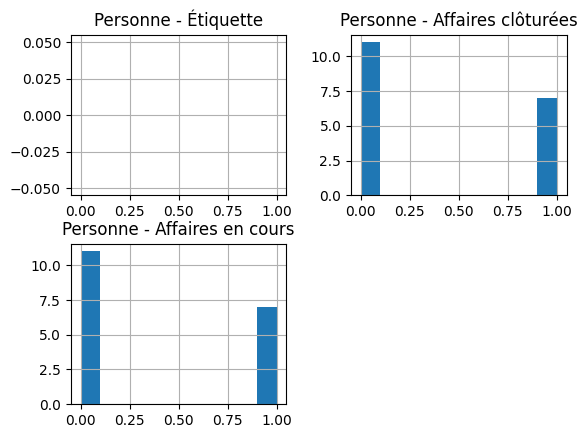

In [31]:
df.hist()

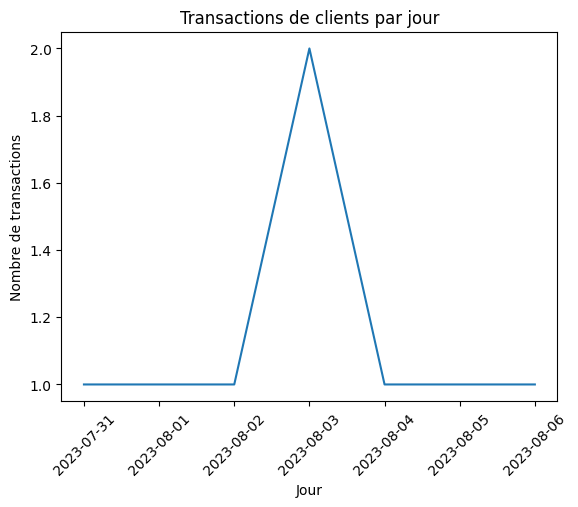

In [35]:
# Convertir la colonne de date en format de date
df['Personne - Date de la prochaine activité'] = pd.to_datetime(df['Personne - Date de la prochaine activité'])

# Regrouper les transactions par jour et compter le nombre de transactions par jour
transactions_par_jour = df.groupby(df['Personne - Date de la prochaine activité'].dt.date).size()

# Créer le graphique
plt.plot(transactions_par_jour.index, transactions_par_jour.values)
plt.xlabel('Jour')
plt.ylabel('Nombre de transactions')
plt.title('Transactions de clients par jour')
plt.xticks(rotation=45)
plt.show()